# Comparison between training with and without Adam optimizer 

## Import libreries and define global variables

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [2]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [3]:
df = get_data(f'{DIR}data/MONK/monks-1.train')
df_test = get_data(f'{DIR}data/MONK/monks-1.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [4]:
test_frac = 1/4

In [5]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [6]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [7]:
preprocessing = 0

In [8]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [16]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.1,
        'lam': 0.0,
        'alpha': 0.9,
        'n_batch': 124,
        'use_opt':0,
        'nest': False,
        'l1_reg' : False,
        'epochs' : 500
        }

seed = np.random.randint(10,10000)

### No optimizer

Build model

In [17]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_weights_list()

Training without Adam optimizer:

In [18]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.retrain(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    test_data = [X_test_monk, y_test_monk.reshape((1,X_test_monk.shape[1]))],
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 7.284e-01, test_loss: 6.993e-01; train_accuracy: 4.032e+01, test_accuracy: 5.255e+01  train_MSE: 2.672e-01, test_MSE: 2.528e-01  lr : 0.1
Epoch 1: train_loss: 7.243e-01, test_loss: 6.962e-01; train_accuracy: 4.274e+01, test_accuracy: 5.301e+01  train_MSE: 2.653e-01, test_MSE: 2.514e-01  lr : 0.1
Epoch 2: train_loss: 7.190e-01, test_loss: 6.922e-01; train_accuracy: 4.194e+01, test_accuracy: 5.301e+01  train_MSE: 2.627e-01, test_MSE: 2.494e-01  lr : 0.1
Epoch 3: train_loss: 7.130e-01, test_loss: 6.877e-01; train_accuracy: 4.435e+01, test_accuracy: 5.394e+01  train_MSE: 2.598e-01, test_MSE: 2.473e-01  lr : 0.1
Epoch 4: train_loss: 7.068e-01, test_loss: 6.832e-01; train_accuracy: 4.677e+01, test_accuracy: 5.625e+01  train_MSE: 2.568e-01, test_MSE: 2.451e-01  lr : 0.1
Epoch 5: train_loss: 7.007e-01, test_loss: 6.789e-01; train_accuracy: 5.000e+01, test_accuracy: 5.625e+01  train_MSE: 2.538e-01, test_MSE: 2.430e-01  lr : 0.1
Epoch 6: train_loss: 6.949e-01, test_loss: 6.7

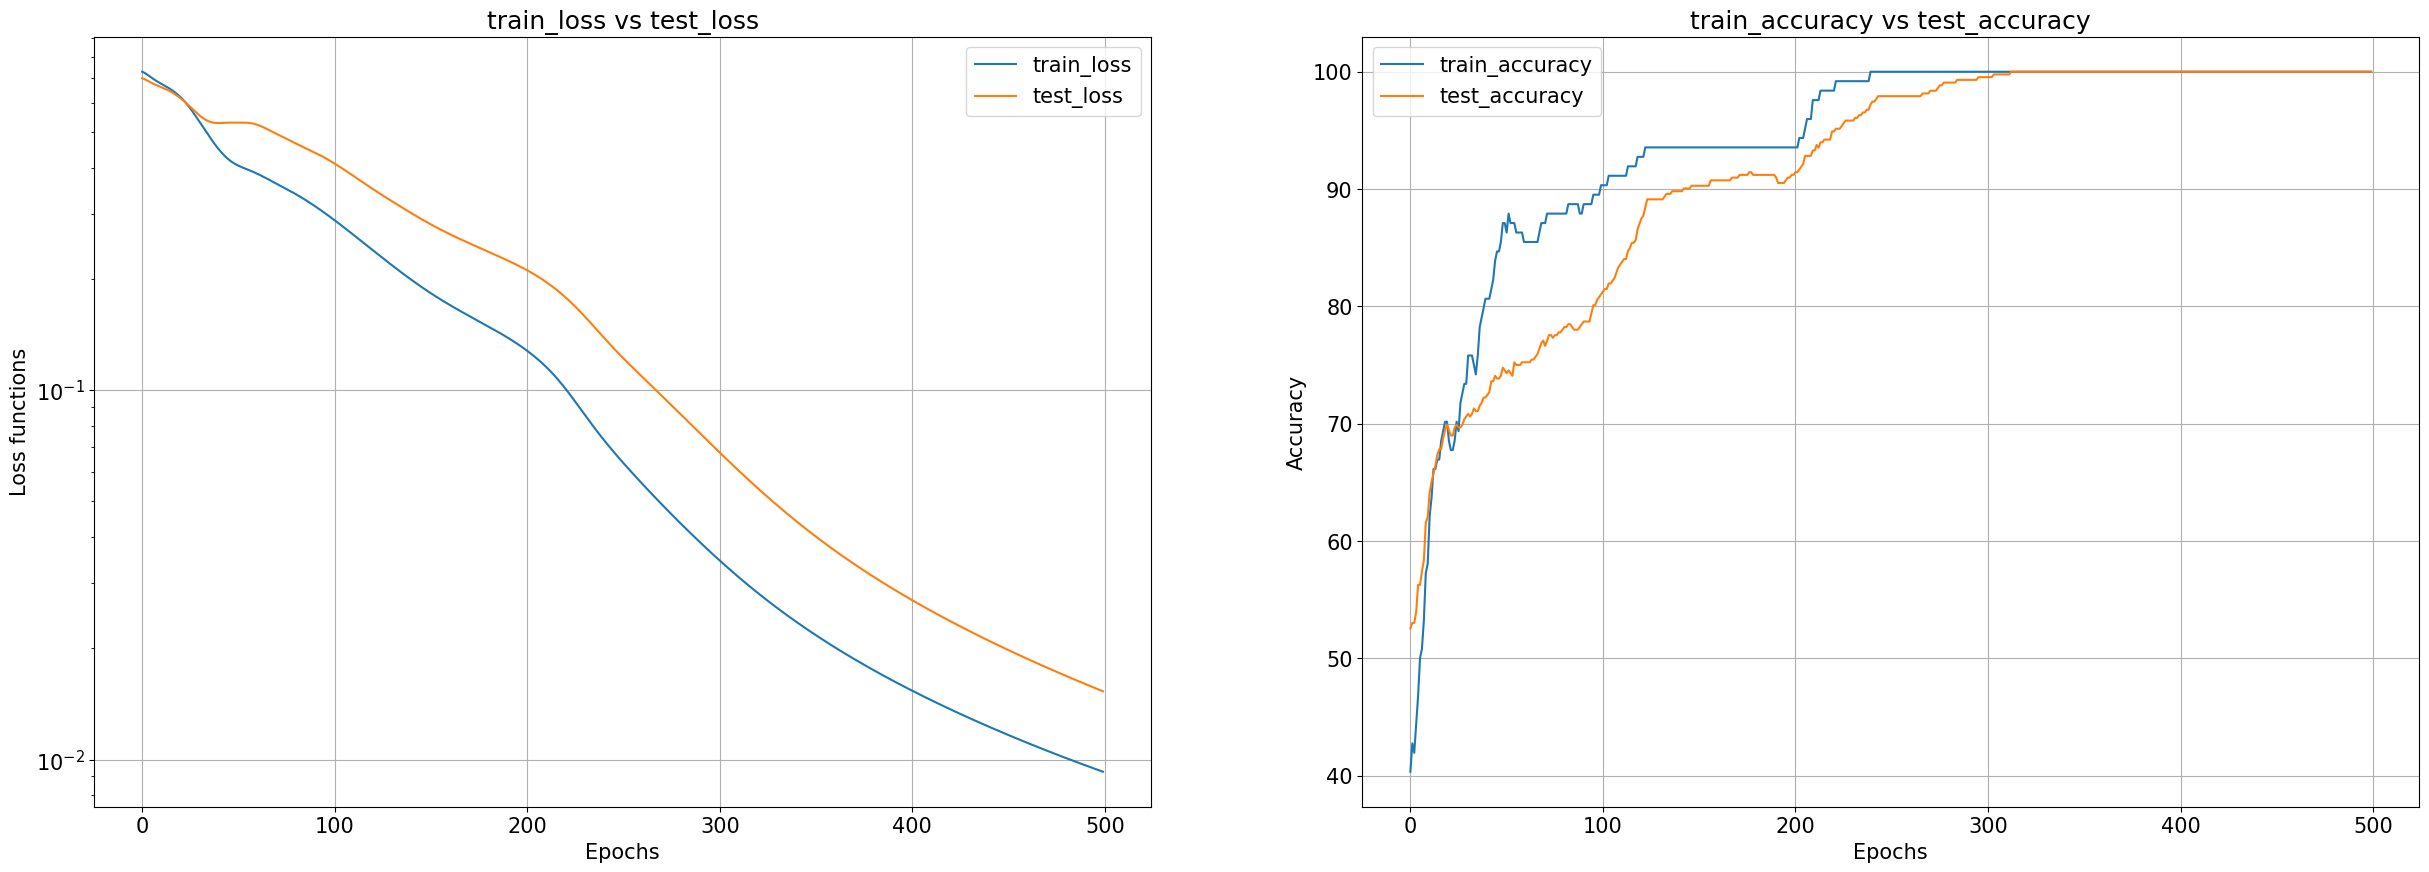

In [19]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['test_loss'], label='test_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs test_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_accuracy'],label='train_accuracy')
plt.plot(history_noopt['test_accuracy'], label='test_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs test_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [20]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_weights_list()

Training with Adam optimizer:


In [21]:
np.random.seed(seed)
params['use_opt'] = 1
history_opt = model.retrain(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    test_data = [X_test_monk, y_test_monk.reshape((1,X_test_monk.shape[1]))],
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.869e-01, test_loss: 6.764e-01; train_accuracy: 5.887e+01, test_accuracy: 5.880e+01  train_MSE: 2.468e-01, test_MSE: 2.417e-01  lr : 0.1
Epoch 1: train_loss: 6.590e-01, test_loss: 6.599e-01; train_accuracy: 6.613e+01, test_accuracy: 6.690e+01  train_MSE: 2.330e-01, test_MSE: 2.335e-01  lr : 0.1
Epoch 2: train_loss: 6.337e-01, test_loss: 6.397e-01; train_accuracy: 6.774e+01, test_accuracy: 6.944e+01  train_MSE: 2.208e-01, test_MSE: 2.237e-01  lr : 0.1
Epoch 3: train_loss: 6.060e-01, test_loss: 6.192e-01; train_accuracy: 7.097e+01, test_accuracy: 6.782e+01  train_MSE: 2.078e-01, test_MSE: 2.142e-01  lr : 0.1
Epoch 4: train_loss: 5.767e-01, test_loss: 6.026e-01; train_accuracy: 7.258e+01, test_accuracy: 6.644e+01  train_MSE: 1.946e-01, test_MSE: 2.072e-01  lr : 0.1
Epoch 5: train_loss: 5.446e-01, test_loss: 5.875e-01; train_accuracy: 7.823e+01, test_accuracy: 6.968e+01  train_MSE: 1.802e-01, test_MSE: 2.007e-01  lr : 0.1
Epoch 6: train_loss: 5.119e-01, test_loss: 5.7

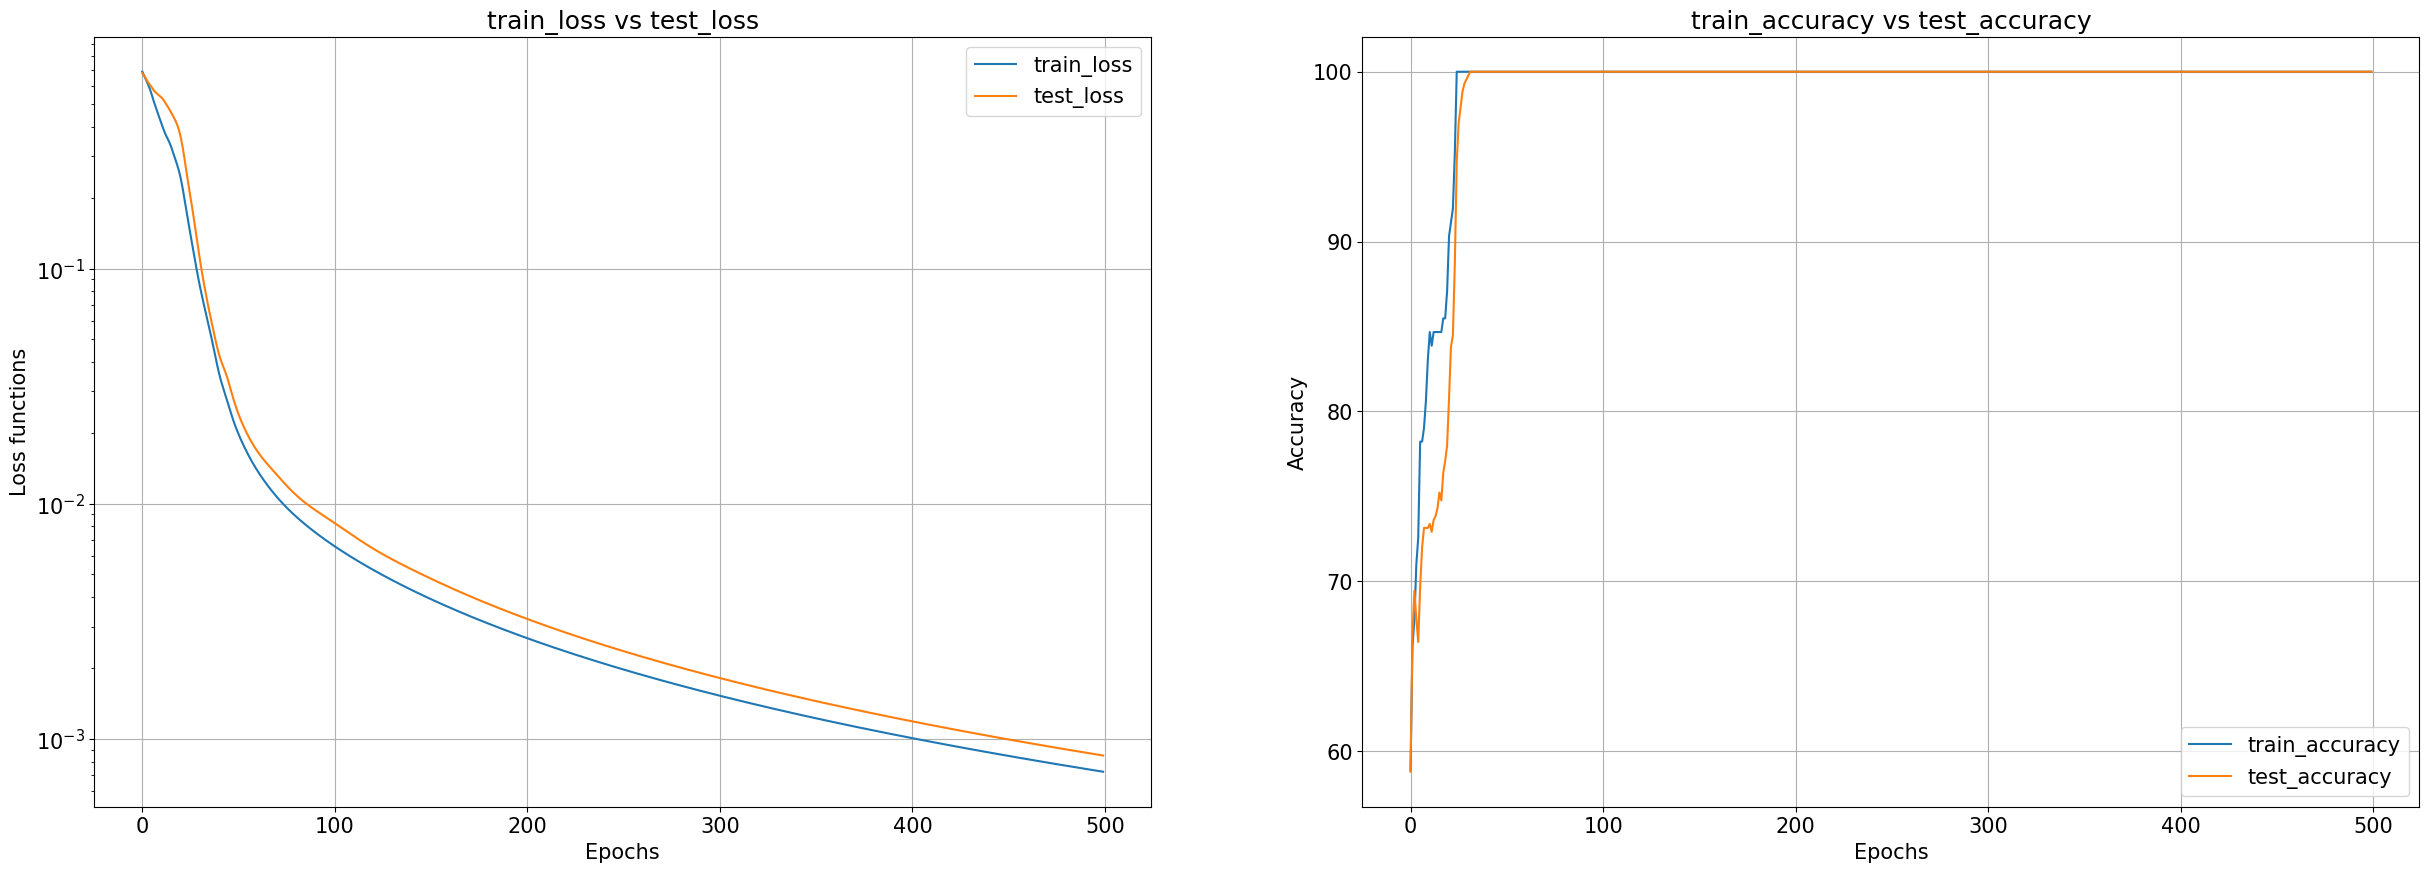

In [22]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['test_loss'], label='test_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs test_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_accuracy'],label='train_accuracy')
plt.plot(history_opt['test_accuracy'], label='test_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs test_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

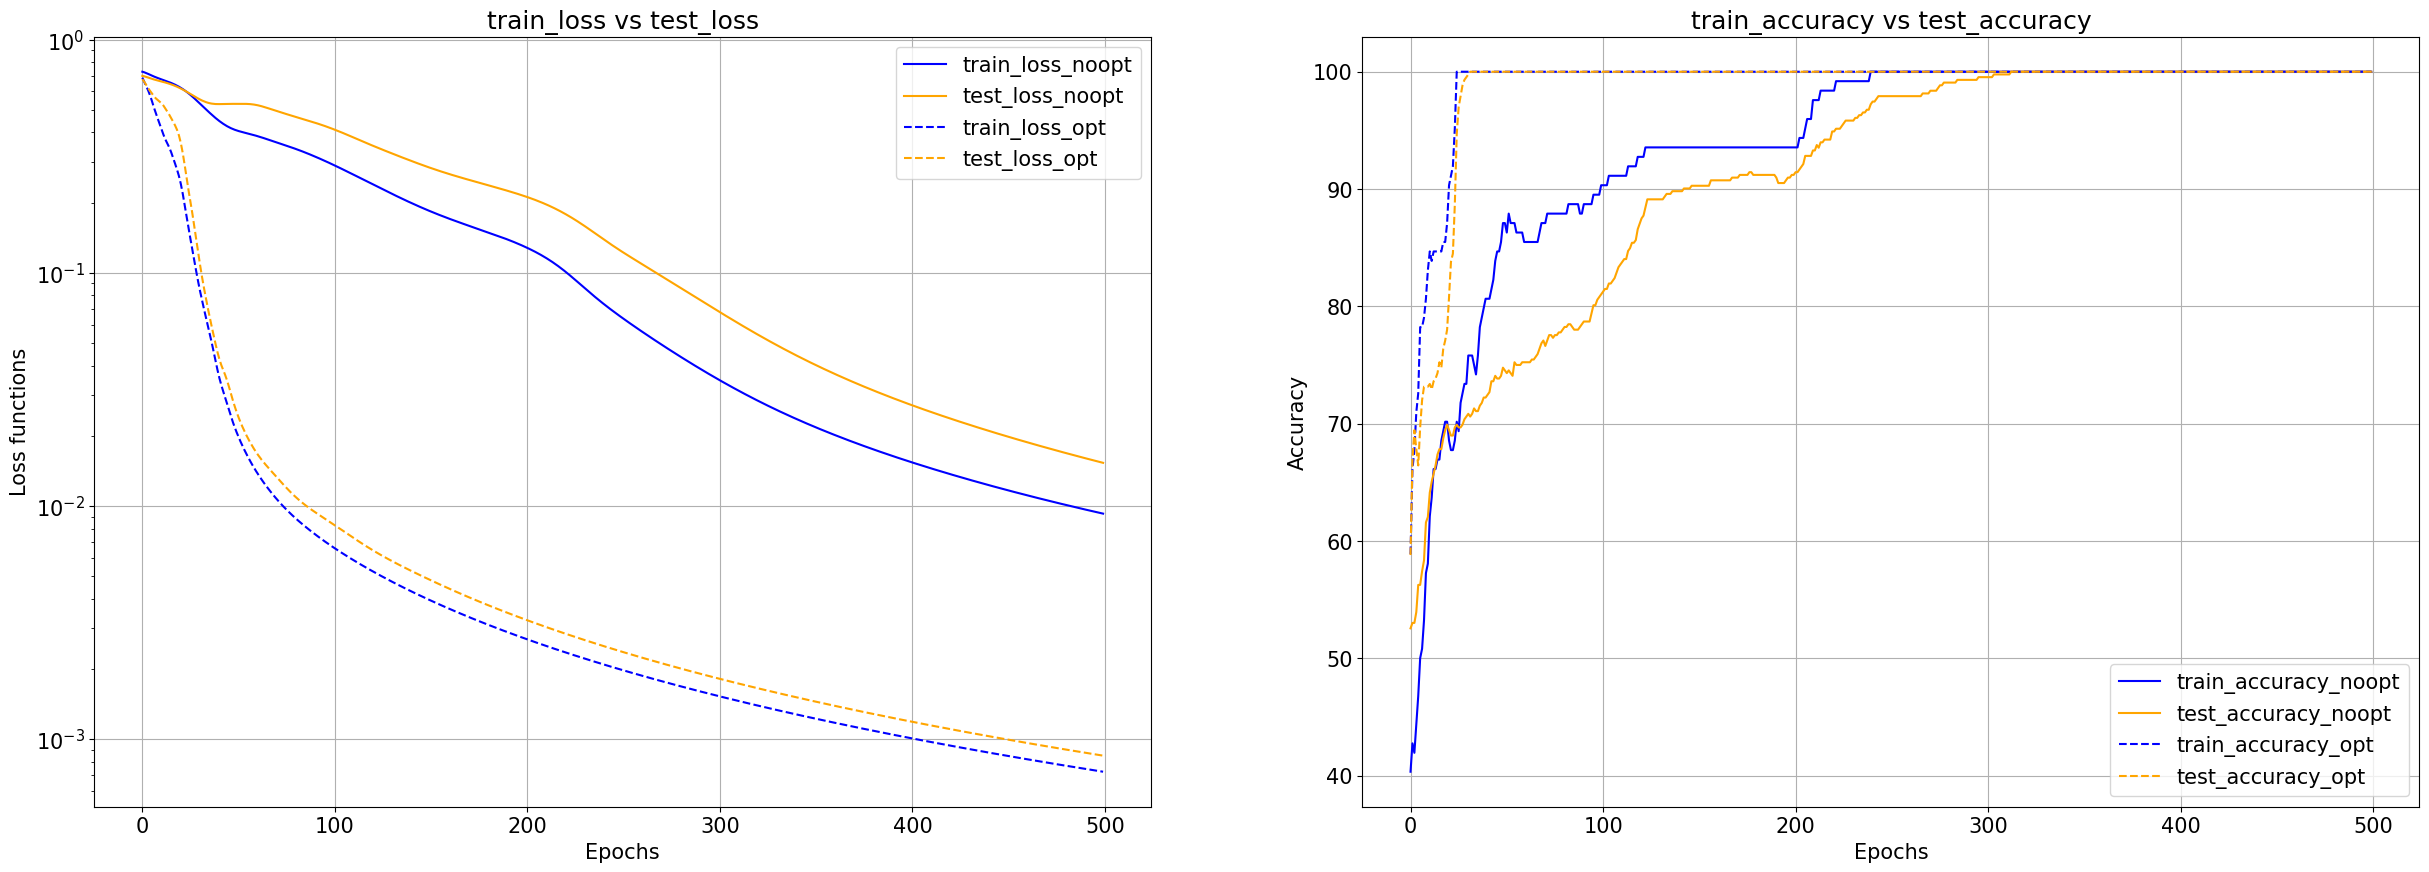

In [23]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['test_loss'], '-', label='test_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['test_loss'], '--', label='test_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs test_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_accuracy'], '-',label='train_accuracy_noopt', color='blue')
plt.plot(history_noopt['test_accuracy'], '-', label='test_accuracy_noopt', color='orange')
plt.plot(history_opt['train_accuracy'], '--', label='train_accuracy_opt', color='blue')
plt.plot(history_opt['test_accuracy'], '--', label='test_accuracy_opt', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs test_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP

Define training and model hyperparameters

In [24]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.003,
        'lam': 0.0001,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

seed = np.random.randint(10,1000)

### No optimizer

Build model

In [25]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_weights_list()

Training without Adam optimizer:

In [26]:
np.random.seed(seed)
params['use_opt'] = 0
history_noopt = model.retrain(X_train_cup, y_train_cup,
                                    ** params,
                                    test_data = [X_test_cup, y_test_cup],
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 4.162e+02, test_loss: 4.199e+02; train_MEE: 2.963e+01, test_MEE: 2.975e+01  lr : 0.003
Epoch 1: train_loss: 5.804e+01, test_loss: 6.463e+01; train_MEE: 1.129e+01, test_MEE: 1.202e+01  lr : 0.003
Epoch 2: train_loss: 3.163e+01, test_loss: 3.458e+01; train_MEE: 8.646e+00, test_MEE: 9.085e+00  lr : 0.003
Epoch 3: train_loss: 1.756e+01, test_loss: 1.983e+01; train_MEE: 6.359e+00, test_MEE: 6.650e+00  lr : 0.003
Epoch 4: train_loss: 1.093e+01, test_loss: 1.253e+01; train_MEE: 4.933e+00, test_MEE: 5.176e+00  lr : 0.003
Epoch 5: train_loss: 7.804e+00, test_loss: 8.768e+00; train_MEE: 4.177e+00, test_MEE: 4.347e+00  lr : 0.003
Epoch 6: train_loss: 5.704e+00, test_loss: 6.905e+00; train_MEE: 3.556e+00, test_MEE: 3.832e+00  lr : 0.003
Epoch 7: train_loss: 4.378e+00, test_loss: 5.807e+00; train_MEE: 3.074e+00, test_MEE: 3.453e+00  lr : 0.003
Epoch 8: train_loss: 3.525e+00, test_loss: 5.034e+00; train_MEE: 2.738e+00, test_MEE: 3.129e+00  lr : 0.003
Epoch 9: train_loss: 2.900e+

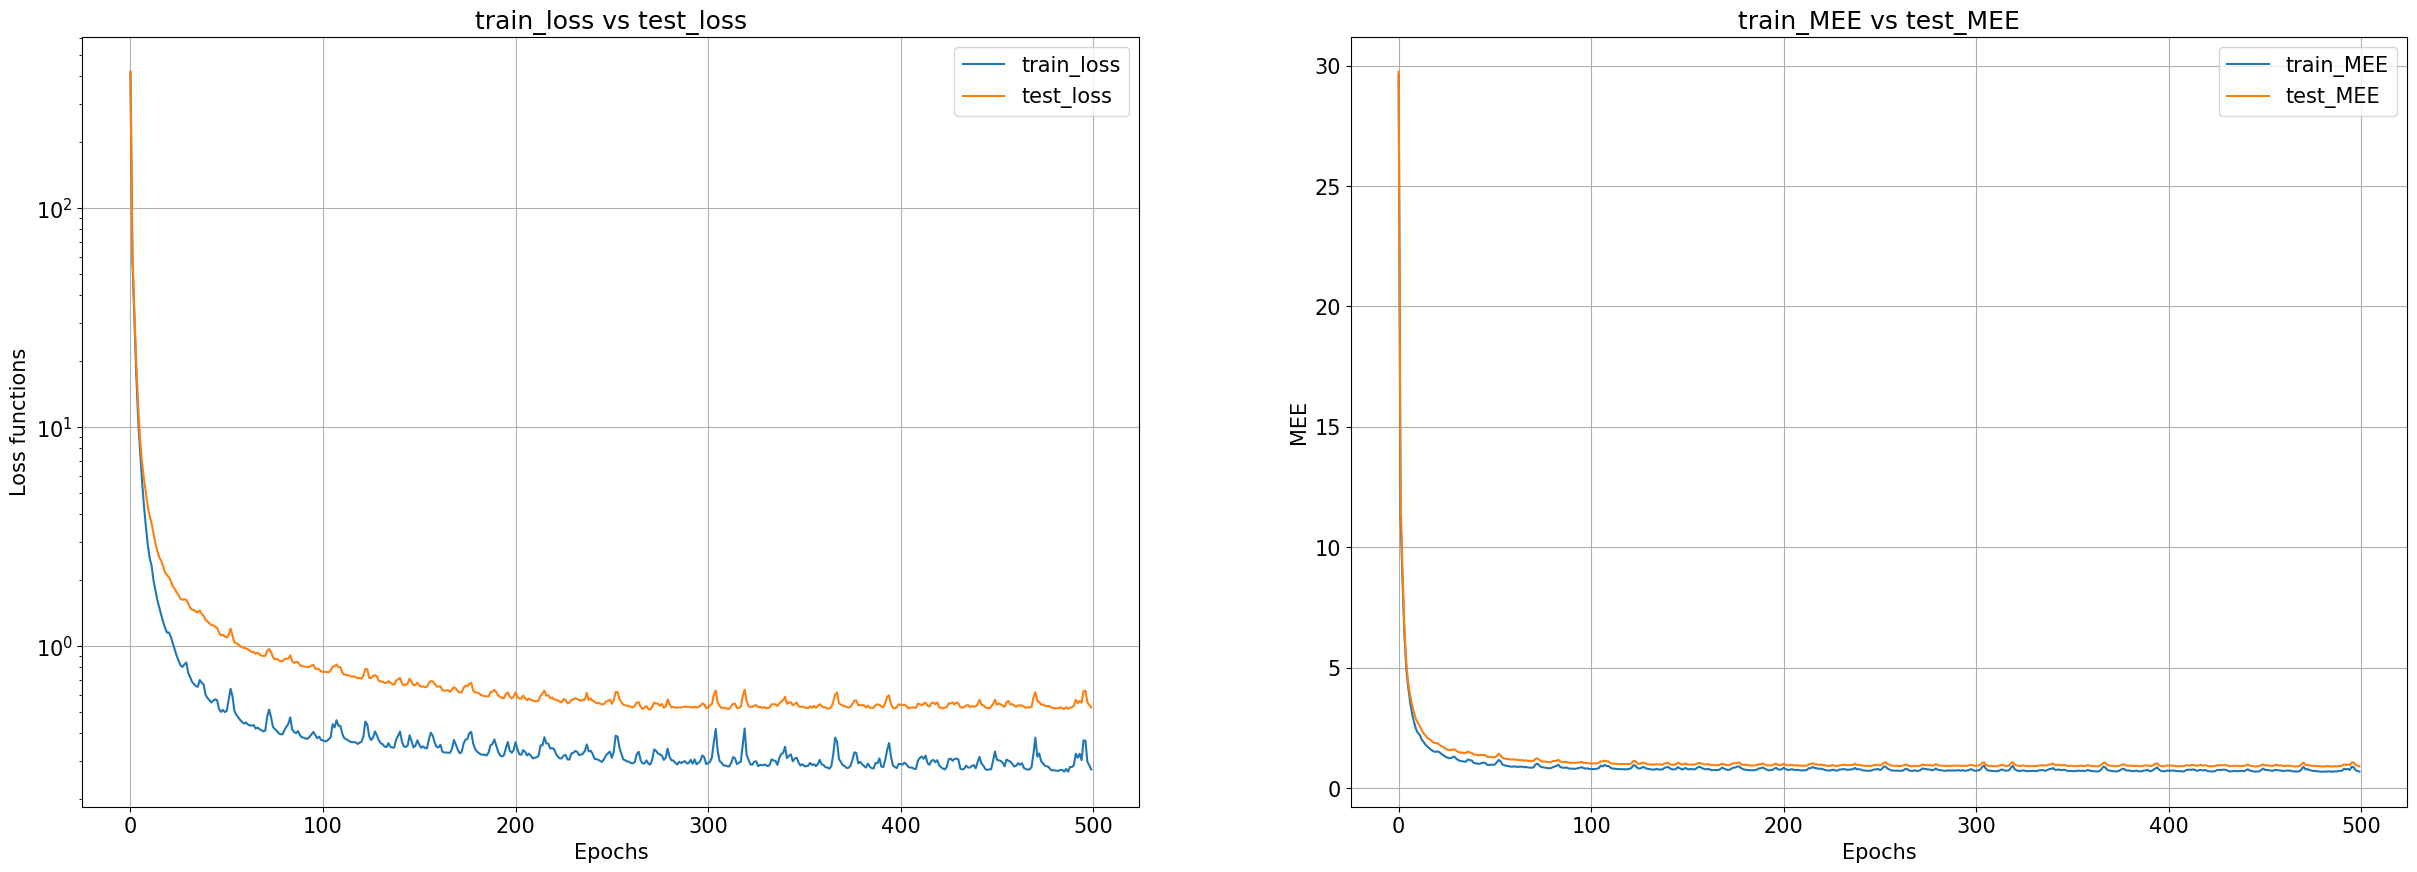

In [27]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'],label='train_loss')
plt.plot(history_noopt['test_loss'], label='test_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs test_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_MEE'],label='train_MEE')
plt.plot(history_noopt['test_MEE'], label='test_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs test_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### Adam optimizer


Build model


In [28]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with Adam optimizer:


In [30]:
np.random.seed(seed)
params['use_opt'] = 1
history_opt = model.retrain(X_train_cup, y_train_cup,
                                    ** params,
                                    test_data = [X_test_cup, y_test_cup],
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 7.421e+02, test_loss: 7.448e+02; train_MEE: 4.178e+01, test_MEE: 4.186e+01  lr : 0.003
Epoch 1: train_loss: 6.834e+02, test_loss: 6.870e+02; train_MEE: 3.982e+01, test_MEE: 3.993e+01  lr : 0.003
Epoch 2: train_loss: 6.344e+02, test_loss: 6.369e+02; train_MEE: 3.811e+01, test_MEE: 3.821e+01  lr : 0.003
Epoch 3: train_loss: 5.922e+02, test_loss: 5.949e+02; train_MEE: 3.663e+01, test_MEE: 3.673e+01  lr : 0.003
Epoch 4: train_loss: 5.564e+02, test_loss: 5.595e+02; train_MEE: 3.534e+01, test_MEE: 3.545e+01  lr : 0.003
Epoch 5: train_loss: 5.257e+02, test_loss: 5.286e+02; train_MEE: 3.417e+01, test_MEE: 3.428e+01  lr : 0.003
Epoch 6: train_loss: 4.980e+02, test_loss: 5.011e+02; train_MEE: 3.310e+01, test_MEE: 3.321e+01  lr : 0.003
Epoch 7: train_loss: 4.736e+02, test_loss: 4.763e+02; train_MEE: 3.213e+01, test_MEE: 3.223e+01  lr : 0.003
Epoch 8: train_loss: 4.513e+02, test_loss: 4.542e+02; train_MEE: 3.124e+01, test_MEE: 3.134e+01  lr : 0.003
Epoch 9: train_loss: 4.316e+

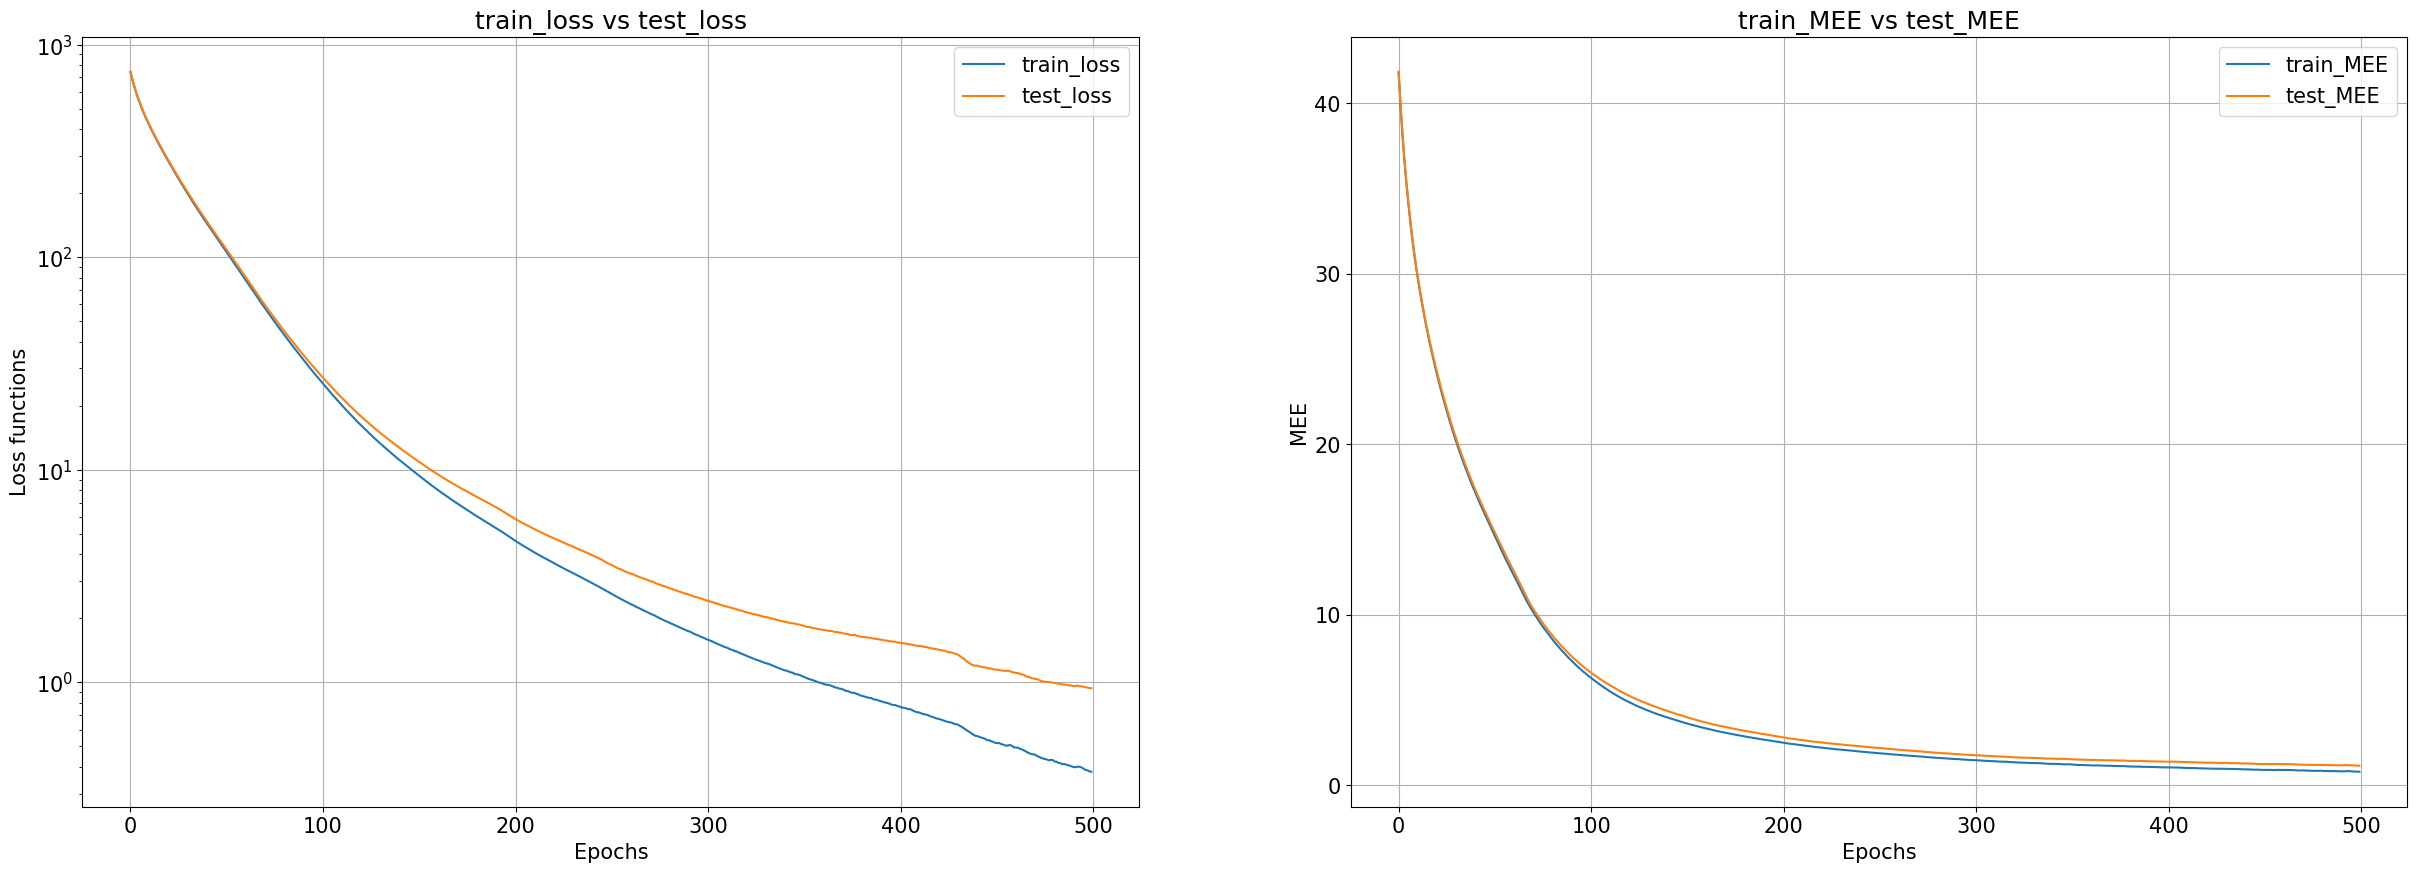

In [31]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_opt['train_loss'],label='train_loss')
plt.plot(history_opt['test_loss'], label='test_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs test_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_opt['train_MEE'],label='train_MEE')
plt.plot(history_opt['test_MEE'], label='test_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs test_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

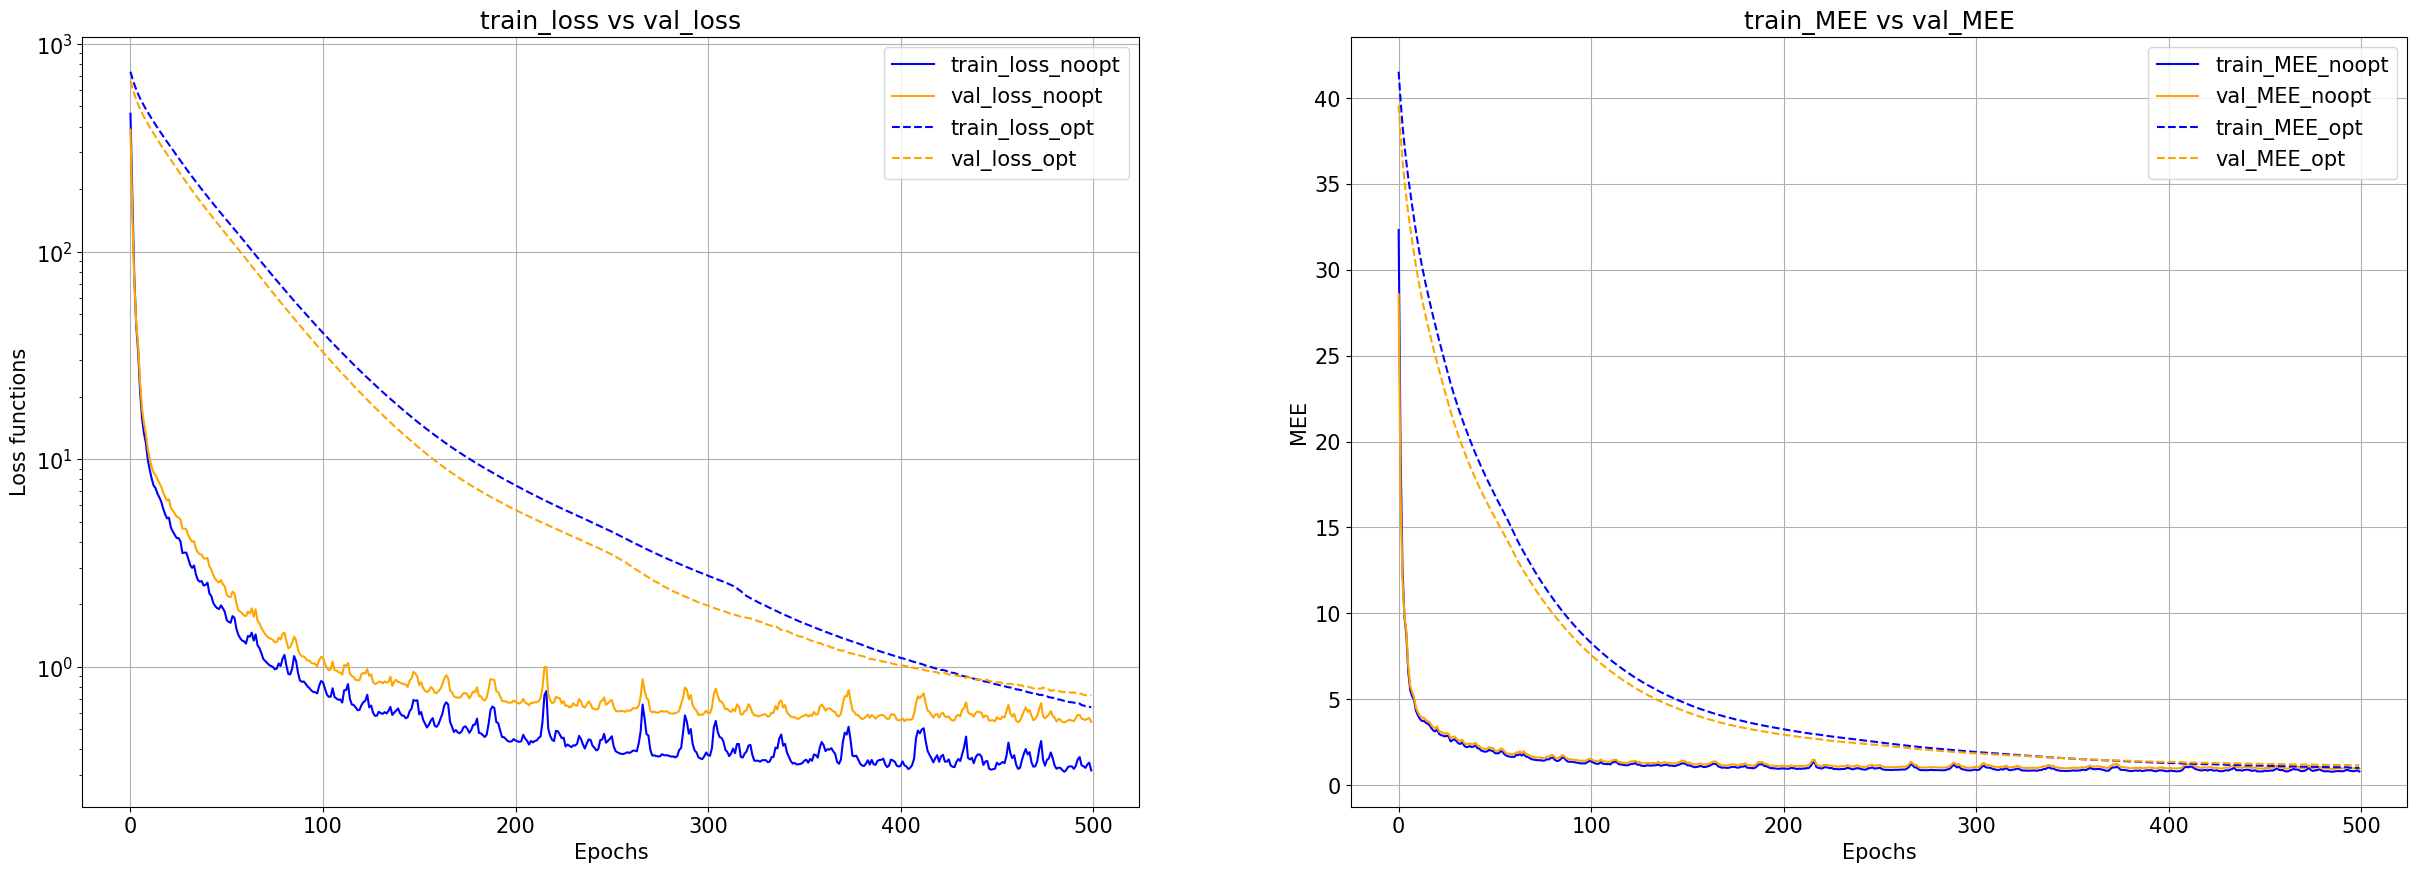

In [57]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_noopt['train_loss'], '-', label='train_loss_noopt', color='blue')
plt.plot(history_noopt['test_loss'], '-', label='test_loss_noopt', color='orange')
plt.plot(history_opt['train_loss'], '--', label='train_loss_opt', color='blue')
plt.plot(history_opt['test_loss'], '--', label='test_loss_opt', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs test_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_noopt['train_MEE'], '-',label='train_MEE_noopt', color='blue')
plt.plot(history_noopt['test_MEE'], '-', label='test_MEE_noopt', color='orange')
plt.plot(history_opt['train_MEE'], '--', label='train_MEE_opt', color='blue')
plt.plot(history_opt['test_MEE'], '--', label='test_MEE_opt', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)